<a href="https://www.kaggle.com/code/nikhil1e9/s3-e22-full-feature-analysis?scriptVersionId=147536126" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# <p style="font-family: Georgia; letter-spacing: 1px; color:#2F1B25; font-size:110%; text-align:center; padding: 0px; border-bottom: 2px solid #000000; padding-top: 0px; padding-bottom: 5px"> Initial Setup 🪜</p>

In [1]:
# Import required libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import copy

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
# plt.style.use('ggplot')

rc_params = {
            "axes.facecolor": "#DDF8E8",
            "figure.facecolor": "#DAC9E0",
            "axes.edgecolor": "#008000",
            "grid.color": "#B22222",
            "font.family": "monospace",
            "axes.labelcolor": "#000000",
            "xtick.color": "#000000",
            "ytick.color": "#000000",
            "grid.alpha": 0.4
}

sns.set(rc=rc_params)

In [2]:
# Importing data
filepaths = []
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        filepaths.append(os.path.join(dirname, filename))
        
sub_path, train_path, test_path = filepaths

Let's have a look at train and test datasets

In [3]:
# Train data
train = pd.read_csv(train_path)
train

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,nasogastric_reflux_ph,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,0,yes,adult,530001,38.1,132.0,24.0,cool,reduced,dark_cyanotic,more_3_sec,depressed,absent,slight,slight,less_1_liter,6.5,decreased,distend_small,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no,died
1,1,yes,adult,533836,37.5,88.0,12.0,cool,normal,pale_cyanotic,more_3_sec,mild_pain,absent,moderate,none,more_1_liter,2.0,absent,distend_small,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no,euthanized
2,2,yes,adult,529812,38.3,120.0,28.0,cool,reduced,pale_pink,less_3_sec,extreme_pain,hypomotile,moderate,slight,none,3.5,NaN,distend_large,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no,lived
3,3,yes,adult,5262541,37.1,72.0,30.0,cold,reduced,pale_pink,more_3_sec,mild_pain,hypomotile,moderate,slight,more_1_liter,2.0,decreased,distend_small,53.0,7.0,cloudy,3.9,yes,2208,0,0,yes,lived
4,4,no,adult,5299629,38.0,52.0,48.0,normal,normal,normal_pink,less_3_sec,alert,hypomotile,none,slight,less_1_liter,7.0,normal,normal,47.0,7.3,cloudy,2.6,no,0,0,0,yes,lived
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,1230,yes,adult,535246,38.5,129.0,48.0,cool,reduced,pale_pink,more_3_sec,depressed,absent,moderate,none,more_1_liter,2.0,NaN,distend_large,57.0,66.0,serosanguious,2.0,yes,2206,0,0,no,lived
1231,1231,yes,adult,528570,37.5,60.0,50.0,cool,reduced,pale_cyanotic,less_3_sec,mild_pain,hypomotile,slight,slight,none,3.0,decreased,distend_small,35.0,6.4,serosanguious,3.6,yes,2209,0,0,yes,died
1232,1232,yes,young,529685,37.5,84.0,40.0,normal,reduced,normal_pink,less_3_sec,mild_pain,hypomotile,slight,slight,none,3.0,increased,firm,40.0,5.9,cloudy,7.0,yes,400,0,0,yes,lived
1233,1233,yes,adult,534784,38.1,70.0,16.0,normal,reduced,bright_red,less_3_sec,mild_pain,hypomotile,slight,none,more_1_liter,2.0,absent,distend_small,58.0,74.0,cloudy,2.0,yes,2209,0,0,no,lived


In [4]:
# Test data
test = pd.read_csv(test_path)
test

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,nasogastric_reflux_ph,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,1235,no,adult,534053,38.6,40.0,20.0,normal,normal,normal_pink,less_3_sec,mild_pain,hypomotile,slight,none,none,7.0,normal,distend_small,42.0,7.5,clear,2.3,no,0,0,0,no
1,1236,yes,adult,528469,38.2,112.0,48.0,cool,reduced,bright_pink,more_3_sec,depressed,hypomotile,moderate,slight,none,3.5,decreased,distend_small,44.0,6.0,serosanguious,2.6,no,2208,0,0,yes
2,1237,yes,adult,528178,37.7,66.0,12.0,cool,normal,bright_red,less_3_sec,mild_pain,hypomotile,slight,slight,none,3.0,normal,distend_small,31.5,6.0,cloudy,1.6,yes,2205,0,0,yes
3,1238,no,adult,534784,37.1,88.0,20.0,cool,reduced,pale_cyanotic,less_3_sec,depressed,absent,severe,slight,more_1_liter,2.0,absent,distend_large,75.0,81.0,NaN,1.0,yes,1400,0,0,no
4,1239,yes,adult,529840,38.3,50.0,12.0,NaN,normal,bright_pink,less_3_sec,mild_pain,absent,slight,slight,none,3.0,decreased,distend_small,37.0,6.8,cloudy,2.6,yes,2208,0,0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,2054,no,adult,529461,40.3,114.0,36.0,cool,reduced,normal_pink,more_3_sec,depressed,hypomotile,moderate,NaN,none,7.0,normal,distend_large,57.0,8.1,serosanguious,4.5,yes,3205,0,0,yes
820,2055,yes,adult,535338,37.2,100.0,20.0,cool,reduced,pale_cyanotic,more_3_sec,extreme_pain,absent,moderate,slight,more_1_liter,2.0,absent,distend_small,50.0,66.0,serosanguious,2.0,yes,2209,0,0,no
821,2056,yes,adult,529640,39.2,132.0,12.0,cool,reduced,dark_cyanotic,more_3_sec,depressed,hypomotile,moderate,slight,more_1_liter,6.5,decreased,NaN,53.0,7.6,serosanguious,4.5,yes,2205,0,0,no
822,2057,no,adult,5287179,38.3,54.0,66.0,normal,normal,normal_pink,less_3_sec,mild_pain,hypomotile,none,slight,none,7.0,normal,NaN,49.0,8.6,clear,5.0,no,3111,0,0,yes


<div style="font-family: Verdana; background-color: #FFC09F; padding: 10px; border-radius: 5px; padding-top: 10px; padding-bottom: 2px;">
    <p style="color: #000000; letter-spacing: 0.5px;">Train data contains 1235 samples while test data have 824. There is very little data to train on in this competition and the test data is also relatively more with the train to test ratio of almost 3:2</p>
</div>

## <p style="font-family: Georgia; letter-spacing: 1px; color:#2F1B25; font-size:110%; text-align:center; padding: 0px; border-bottom: 2px solid #000000; padding-top: 0px; padding-bottom: 5px"> Visualizing null values </p>

Let's visualize the null value contributions for different columns for both the datasets.

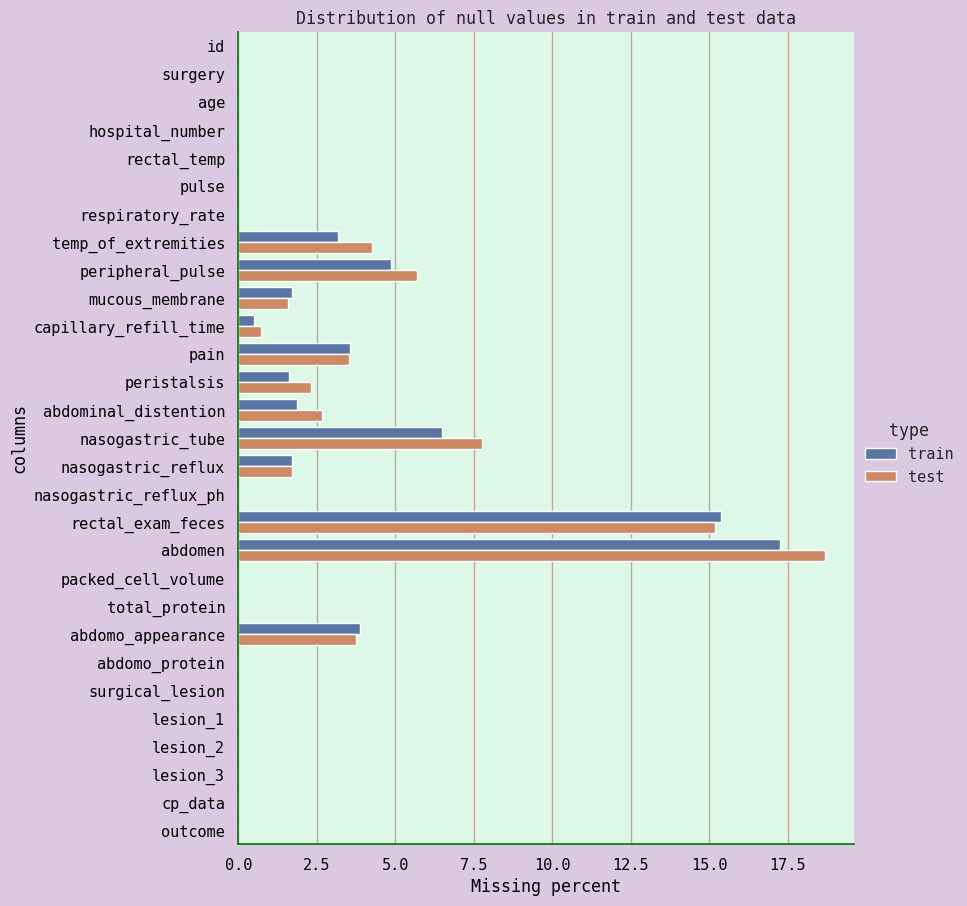

In [5]:
train_null = (train.isnull().sum()*100/len(train)).reset_index()
train_null['type'] = 'train'
test_null = (test.isnull().sum()*100/len(test)).reset_index()
test_null['type'] = 'test'
null_df = pd.concat([train_null, test_null], ignore_index=True)
null_df.columns = ['columns', 'percent', 'type']

sns.catplot(data=null_df, y='columns', x='percent', hue='type', kind='bar', height=9, aspect=1)
plt.xlabel("Missing percent")
plt.title("Distribution of null values in train and test data")
plt.show()

<div style="font-family: Verdana; background-color: #FFC09F; padding: 10px; border-radius: 5px; padding-top: 10px; padding-bottom: 2px;">
    <p style="color: #000000; letter-spacing: 0.5px;">It can be seen from the above plot that some columns have no null values for both train and test data. For the columns that contain null values there are  quite similar percentages of nulls for both train and test data with a little higher null percentage for test data.</p>
</div>

# <p style="font-family: Georgia; letter-spacing: 1px; color:#2F1B25; font-size:110%; text-align:center; padding: 0px; border-bottom: 2px solid #000000; padding-top: 0px; padding-bottom: 5px"> Domain knowledge🤯 + Feature analysis🔎 + Feature engineering🔨</p>

Before moving further to analysis let's first look at each of the features and what they mean in detail. This would be beneficial in feature engineering and feature selection tasks later. There are 28 features (excluding id) and I would do a complete breakdown of every feature in this section. The feature descriptions are taken from -> Source: http://archive.ics.uci.edu/dataset/47/horse+colic

In [6]:
train_df, test_df = train.copy(), test.copy()
train_df['type'] = 'train'
test_df['type'] = 'test'
train_df.drop('outcome', axis=1, inplace=True)
all_df = pd.concat([train_df, test_df], ignore_index=True)

In [7]:
# _, (ax1, ax2) = plt.subplots(1, 2, figsize=(11,5))
# col = 'temp_of_extremities'
# colors = ['#0f000e', '#234552', '#89addc']
# sns.histplot(data=train.fillna("nan"), x=col, hue='outcome', multiple='stack', color=colors, alpha=1, ax=ax1)
# pcts_train = train[col].value_counts(normalize=True, dropna=False).values*100
# patches = ax1.patches
# for i in range(len(patches)):
#     x = patches[i].get_x() + patches[i].get_width()/2
#     y = patches[i].get_height()+.05
#     ax1.annotate('{:.1f}%'.format(pcts_train[i]), (x, y), ha='center')
# # sns.countplot(data=train.fillna("nan"), x=col, color='green')
# # lived = train[train.outcome == 'lived']
# # died = train[train.outcome == 'died']
# # sns.countplot(data=lived, x=col, color='blue')
# # sns.countplot(data=died, x=col, color='red')

In [8]:
def feature_dist(col, bins=None, rot=None):
    if train[col].dtype == 'object':
        _, (ax1, ax2) = plt.subplots(1, 2, figsize=(11,5))
        # Set the order for the columns
        order = train[col].value_counts(dropna=False).index.tolist()
        orderx = copy.deepcopy(order)
        if np.nan in order:
            order[orderx.index(np.nan)] = "nan"

        sns.countplot(data=train.fillna("nan"), x=col, ax=ax1, order=order, palette='crest')
        pcts_train = train[col].value_counts(normalize=True, dropna=False).values*100
        patches = ax1.patches
        for i in range(len(patches)):
            x = patches[i].get_x() + patches[i].get_width()/2
            y = patches[i].get_height()+.05
            ax1.annotate('{:.1f}%'.format(pcts_train[i]), (x, y), ha='center')

        sns.countplot(data=test.fillna("nan"), x=col, ax=ax2, order=order, palette='muted')
        pcts_test = test[col].value_counts(normalize=True, dropna=False)[orderx].values*100
        patches = ax2.patches
        for i in range(len(patches)):
            x = patches[i].get_x() + patches[i].get_width()/2
            y = patches[i].get_height()+.05
            ax2.annotate('{:.1f}%'.format(pcts_test[i]), (x, y), ha='center')
        
        if rot:
            ax1.tick_params(axis='x', labelrotation=rot)
            ax2.tick_params(axis='x', labelrotation=rot)
        ax1.set_title('train', fontsize=11)
        ax2.set_title('test', fontsize=11)
        plt.suptitle(f"Distribution for {col}", fontsize=15)
        plt.show()
    else:
        plt.figure(figsize=(11,6))
        if bins == None:
            sns.histplot(data=all_df, x=col, hue='type', kde=True, palette='magma')
        else:
            sns.histplot(data=all_df, x=col, hue='type', bins=bins, kde=True, palette='magma')
        plt.title(f"Distribution for {col}")
        plt.show()

<div style="border-radius:20px; border:#746AB0 solid; padding: 20px; background-color: #7FFFD4; font-size:100%; text-align:left; padding-top: 5px; padding-bottom: 5px">
<h2 align="left"><font color='#800080'>Outcome</font></h2>
    <p style="line-height: 1.5; font-size:100%; font-family: Verdana; letter-spacing: 0.5px;"><b>What eventually happened to the horse? This is the target variable for this competition</b><br><b>1. lived</b> -> The horse survived <br>
        <b>2. died</b> -> The horse died<br>
        <b>3. euthanized</b> -> The horse was euthanized</p> </div>

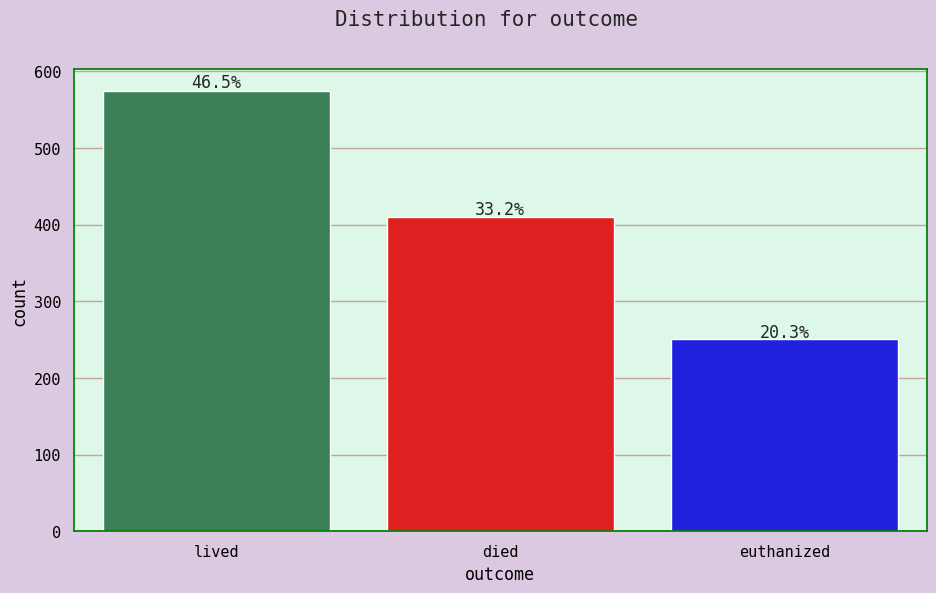

In [9]:
_, ax = plt.subplots(1, 1, figsize=(11,6))
order = train['outcome'].value_counts(dropna=False).index.tolist()
sns.countplot(data=train.fillna("nan"), x='outcome', order=order, palette=['seagreen', 'red', 'blue'])
pcts_train = train['outcome'].value_counts(normalize=True, dropna=False).values*100
patches = ax.patches
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width()/2
    y = patches[i].get_height()*1.01+.05
    ax.annotate('{:.1f}%'.format(pcts_train[i]), (x, y), ha='center')
plt.suptitle(f"Distribution for outcome", fontsize=15)
plt.show()

***

<div style="border-radius:20px; border:#746AB0 solid; padding: 20px; background-color: #7FFFD4; font-size:100%; text-align:left; padding-top: 5px; padding-bottom: 5px">
<h2 align="left"><font color='#800080'>Surgery</font></h2>
    <p style="line-height: 1.5; font-size:100%; font-family: Verdana; letter-spacing: 0.5px;"><b>1. yes</b> -> Yes, it had surgery <br>
        <b>2. no</b> -> It was treated without surgery</p> </div>

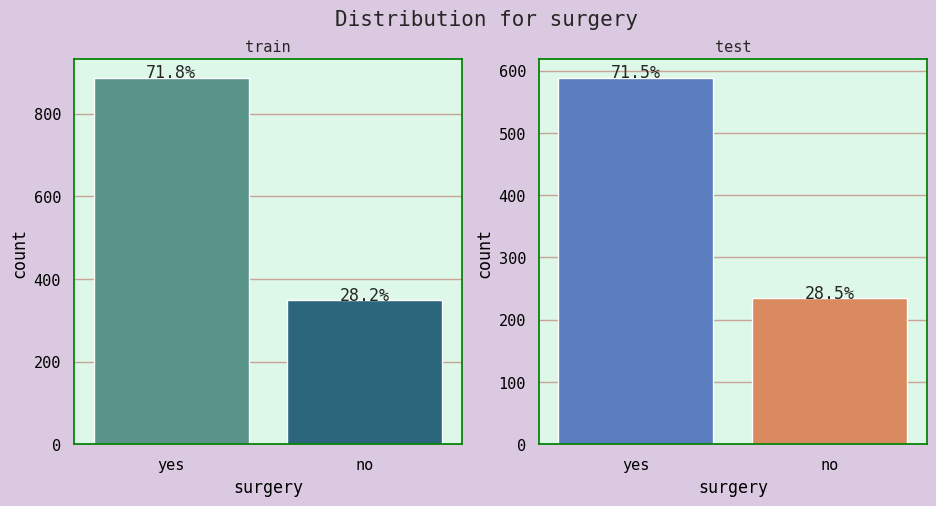

In [10]:
feature_dist('surgery')

***

<div style="border-radius:20px; border:#746AB0 solid; padding: 20px; background-color: #7FFFD4; font-size:100%; text-align:left; padding-top: 5px; padding-bottom: 5px">
<h2 align="left"><font color='#800080'>Age</font></h2>
    <p style="line-height: 1.5; font-size:100%; font-family: Verdana; letter-spacing: 0.5px;"><b>1. adult</b> -> Adult horse <br>
        <b>2. young</b> -> Young horse (&lt; 6 months)</p> </div>

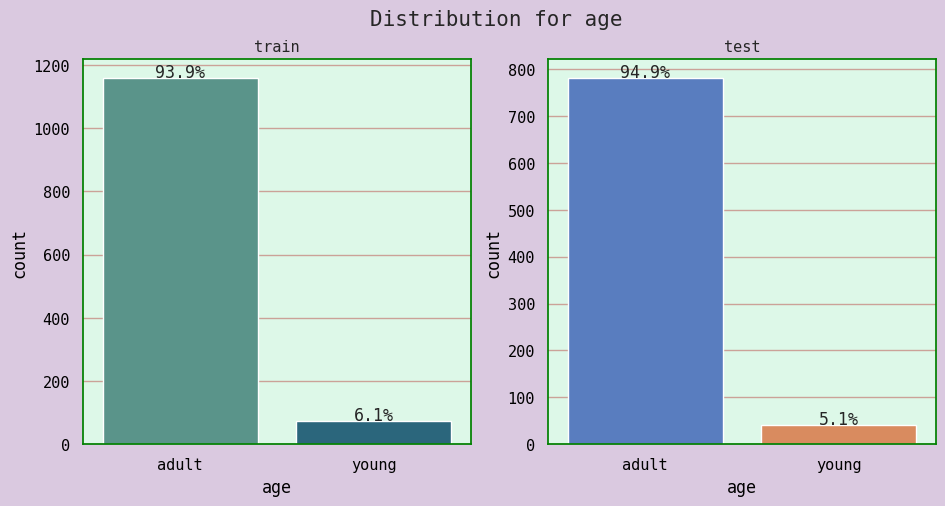

In [11]:
feature_dist('age')

***

<div style="border-radius:20px; border:#746AB0 solid; padding: 20px; background-color: #7FFFD4; font-size:100%; text-align:left; padding-top: 5px; padding-bottom: 5px">
<h2 align="left"><font color='#800080'>Hospital number</font></h2>
    <p style="line-height: 1.5; font-size:100%; font-family: Verdana; letter-spacing: 0.5px;"> <b>The case number assigned to the horse</b> (may not be unique if the horse is treated &gt; 1 time) </p> </div>

In [12]:
train.groupby('hospital_number').id.count().sort_values(ascending=False)

hospital_number
529461     46
528548     32
528996     21
5290409    20
530242     20
           ..
529764      1
529736      1
535240      1
529628      1
5305129     1
Name: id, Length: 255, dtype: int64

<div style="font-family: Verdana; background-color: #FFC09F; padding: 10px; border-radius: 5px; padding-top: 10px; padding-bottom: 2px; letter-spacing: 0.5px">
    <p> I am quite doubtful of this feature. Let's include it for now and remove later if this won't be important</p>
    </div>

***

<div style="border-radius:20px; border:#746AB0 solid; padding: 20px; background-color: #7FFFD4; font-size:100%; text-align:left; padding-top: 5px; padding-bottom: 5px">
<h2 align="left"><font color='#800080'>Rectal temperature</font></h2>
    <p style="line-height: 1.5; font-size:100%; font-family: Verdana; letter-spacing: 0.5px;"> <b>The temperature of the horse in degree celsius</b></p>
</div>

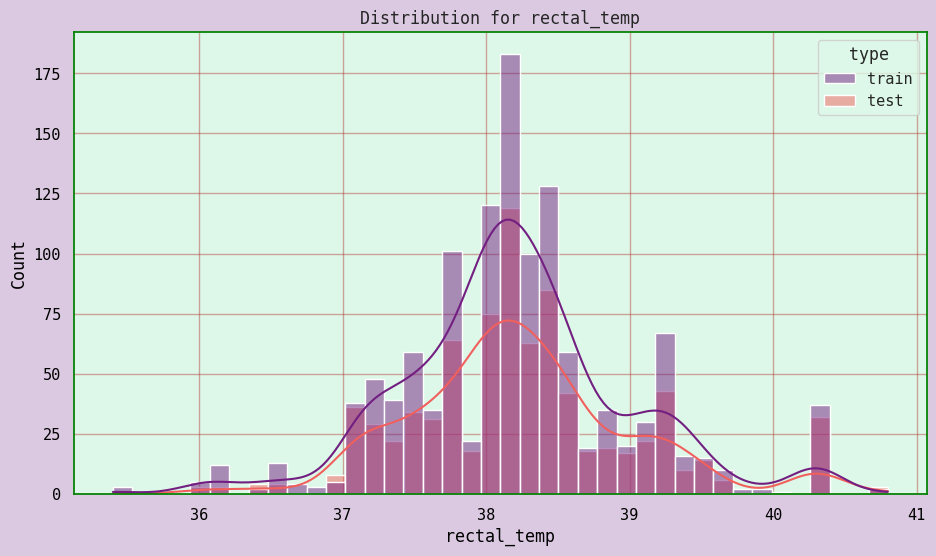

In [13]:
feature_dist('rectal_temp', bins=40)

<div style="font-family: Verdana; background-color: #FFC09F; padding: 10px; border-radius: 5px; padding-top: 10px; padding-bottom: 2px; letter-spacing: 0.5px">
    <ul>
        <li><b><i>Normal temperature is 37.8 C</i></b></li> 
        <li><b><i>An elevated temperature may occur due to infection</i></b></li> 
        <li><b><i>Temperature may be reduced when the animal is in late shock</i></b></li>
        <li><b><i>This parameter will usually change as the problem progresses, e.g. may start out normal, then become elevated because of the lesion, passing back through the normal range as the horse goes into shock</i></b></li>
    </ul>

The normal temperature of a horse is given as 37.8. Let's transform this feature and normalize by subtracting 37.8. Now this will give us the absolute deviation from the normal temperature values.

In [14]:
def median_feature(feat, cat):
    print(f"Median {feat} value for horses that {cat}: {train[train['outcome'] == cat][feat].median()}")

In [15]:
median_feature('rectal_temp', 'lived')
median_feature('rectal_temp', 'died')
median_feature('rectal_temp', 'euthanized')

Median rectal_temp value for horses that lived: 38.2
Median rectal_temp value for horses that died: 38.1
Median rectal_temp value for horses that euthanized: 38.1


In [16]:
train['rectal_temp_norm'] = abs(train['rectal_temp'] - 37.8)
test['rectal_temp_norm'] = abs(test['rectal_temp'] - 37.8)

***

<div style="border-radius:20px; border:#746AB0 solid; padding: 20px; background-color: #7FFFD4; font-size:100%; text-align:left; padding-top: 5px; padding-bottom: 5px">
<h2 align="left"><font color='#800080'>Pulse</font></h2>
    <p style="line-height: 1.5; font-size:100%; font-family: Verdana; letter-spacing: 0.5px;"> <b>Heart rate of the horse in beats per minute</b></p> 
</div>

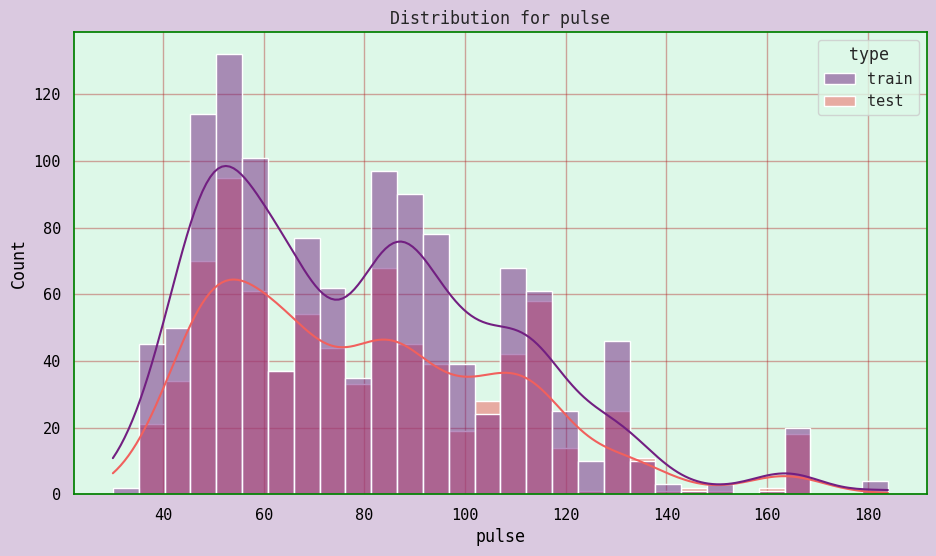

In [17]:
feature_dist('pulse', bins=30)

<div style="font-family: Verdana; background-color: #FFC09F; padding: 10px; border-radius: 5px; padding-top: 10px; padding-bottom: 2px; letter-spacing: 0.5px">    
    <ul>
        <li><b><i>Reflection of the heart condition: 30-40 is normal for adults</i></b></li> 
        <li><b><i>Rare to have a lower than normal rate although athletic horses may have a rate of 20-25</i></b></li> 
        <li><b><i>Animals with painful lesions or suffering from circulatory shock may have an elevated heart rate</i></b></li>
    </ul>

In [18]:
median_feature('pulse', 'lived')
median_feature('pulse', 'died')
median_feature('pulse', 'euthanized')

Median pulse value for horses that lived: 60.0
Median pulse value for horses that died: 88.0
Median pulse value for horses that euthanized: 88.0


There is a clear cut difference between pulse of alive horses than the other two categories. This can be a crucial feature. Let's transform this by taking the absolute difference from the median.

In [19]:
train['pulse_norm'] = abs(train['pulse'] - 60)
test['pulse_norm'] = abs(test['pulse'] - 60)

***

<div style="border-radius:20px; border:#746AB0 solid; padding: 20px; background-color: #7FFFD4; font-size:100%; text-align:left; padding-top: 5px; padding-bottom: 5px">
<h2 align="left"><font color='#800080'>Respiratory rate</font></h2>
    <p style="line-height: 1.5; font-size:100%; font-family: Verdana; letter-spacing: 0.5px;"> <b>Rate of respiration of the horse</b></p> 
</div>

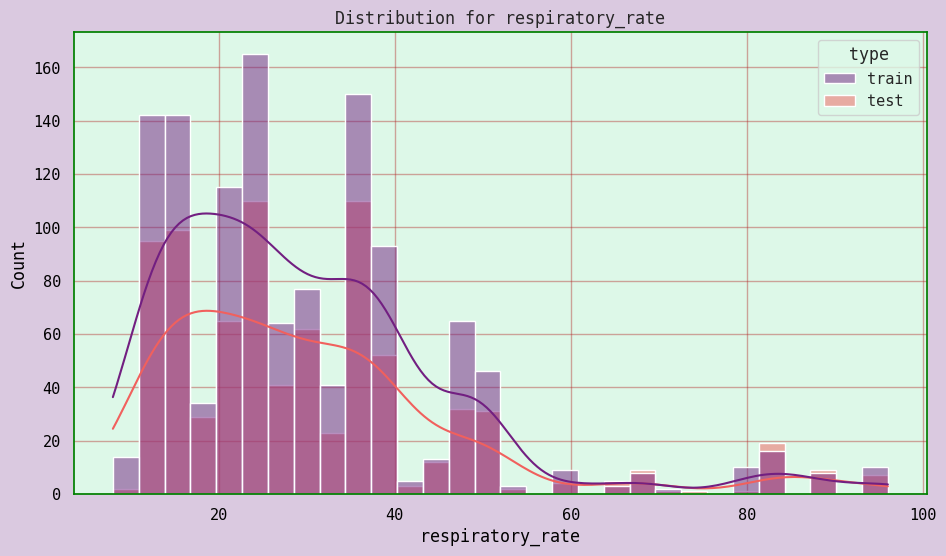

In [20]:
feature_dist('respiratory_rate', bins=30)

<div style="font-family: Verdana; background-color: #FFC09F; padding: 10px; border-radius: 5px; padding-top: 10px; padding-bottom: 2px; letter-spacing: 0.5px">    
    <ul>
        <li><b><i>Normal rate is 8 to 10</i></b></li> 
        <li><b><i>Usefulness is doubtful due to the great fluctuations</i></b></li> 
    </ul>

In [21]:
median_feature('respiratory_rate', 'lived')
median_feature('respiratory_rate', 'died')
median_feature('respiratory_rate', 'euthanized')

Median respiratory_rate value for horses that lived: 24.0
Median respiratory_rate value for horses that died: 30.0
Median respiratory_rate value for horses that euthanized: 28.0


***

<div style="border-radius:20px; border:#746AB0 solid; padding: 20px; background-color: #7FFFD4; font-size:100%; text-align:left; padding-top: 5px; padding-bottom: 5px">
<h2 align="left"><font color='#800080'>Temperature of extremities</font></h2>
    <p style="line-height: 1.5; font-size:100%; font-family: Verdana; letter-spacing: 0.5px;"><b>A subjective indication of peripheral circulation</b><br>
        <b>1. normal</b><br>
        <b>2. warm</b><br>
        <b>3. cool</b><br>
        <b>4. cold</b> </p>
</div>

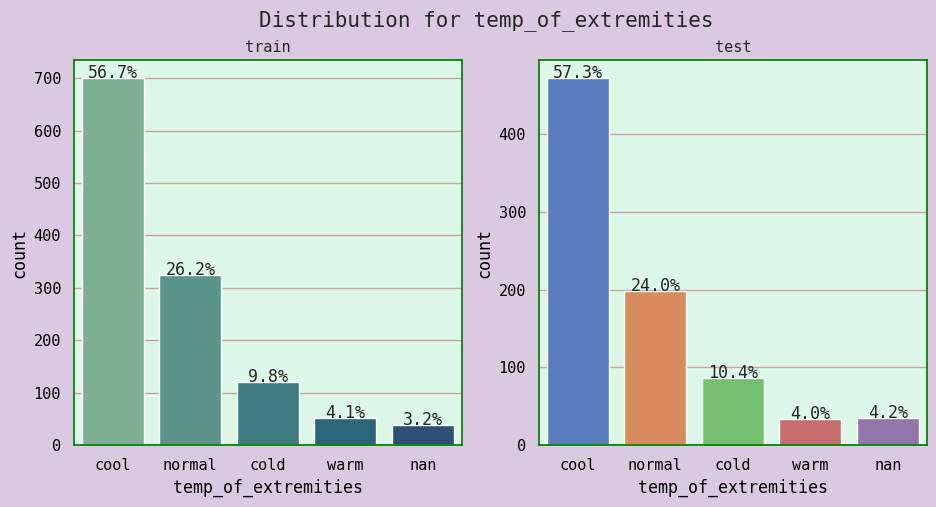

In [22]:
feature_dist('temp_of_extremities')

<div style="font-family: Verdana; background-color: #FFC09F; padding: 10px; border-radius: 5px; padding-top: 10px; padding-bottom: 2px; letter-spacing: 0.5px">    
    <ul>
        <li><b><i>Cool to Cold extremities indicate possible shock</i></b></li>
        <li><b><i>Hot extremities should correlate with an elevated rectal temp</i></b></li
    </ul>

***

<div style="border-radius:20px; border:#746AB0 solid; padding: 20px; background-color: #7FFFD4; font-size:100%; text-align:left; padding-top: 5px; padding-bottom: 5px">
<h2 align="left"><font color='#800080'>Peripheral pulse</font></h2>
    <p style="line-height: 1.5; font-size:100%; font-family: Verdana; letter-spacing: 0.5px;">
        <b>1. normal</b><br>
        <b>2. increased</b><br>
        <b>3. reduced</b><br>
        <b>4. absent</b>
</p></div>

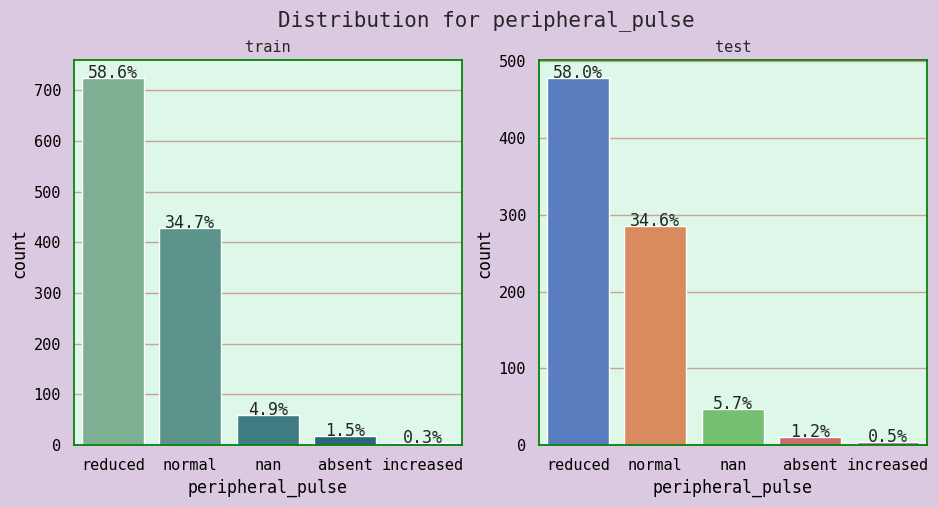

In [23]:
feature_dist('peripheral_pulse')

<div style="font-family: Verdana; background-color: #FFC09F; padding: 10px; border-radius: 5px; padding-top: 10px; padding-bottom: 2px; letter-spacing: 0.5px"> 
    <ul>
        <li><b><i>Normal or increased p.p. values are indicative of adequate circulation</i></b></li>
        <li><b><i>Reduced or absent indicate poor perfusion</i></b></li>
    </ul>

***

<div style="border-radius:20px; border:#746AB0 solid; padding: 20px; background-color: #7FFFD4; font-size:100%; text-align:left; padding-top: 5px; padding-bottom: 5px">
<h2 align="left"><font color='#800080'>Mucous membranes</font></h2>
    <p style="line-height: 1.5; font-size:100%; font-family: Verdana; letter-spacing: 0.5px;"><b>A subjective measurement of colour</b><br>
        <b>1. normal pink</b><br>
        <b>2. bright pink</b><br>
        <b>3. pale pink</b><br>
        <b>4. pale cyanotic</b><br>
        <b>5. bright red / injected</b><br>
        <b>6. dark cyanotic</b>
</p></div>

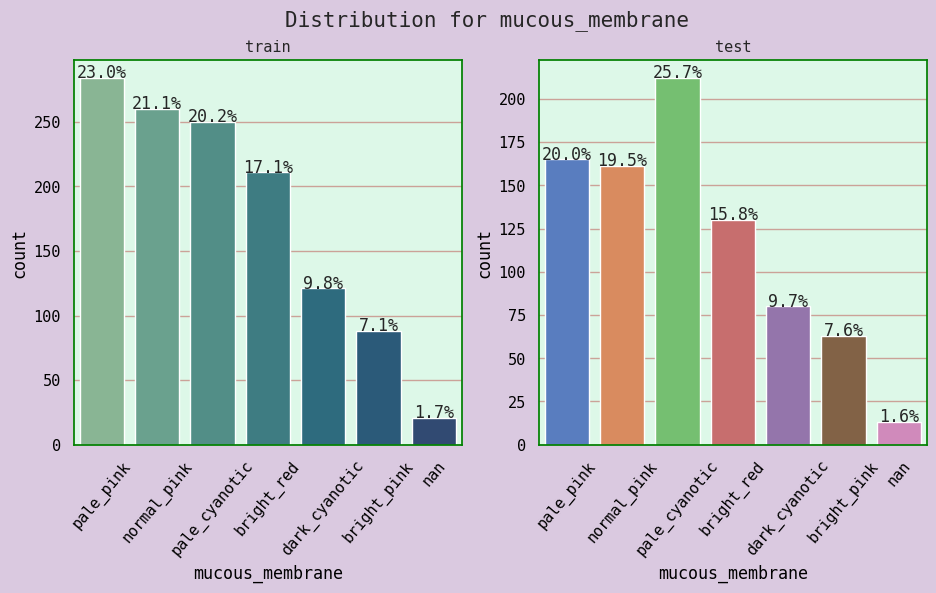

In [24]:
feature_dist('mucous_membrane', rot=50)

<div style="font-family: Verdana; background-color: #FFC09F; padding: 10px; border-radius: 5px; padding-top: 10px; padding-bottom: 2px; letter-spacing: 0.5px"> 
    <ul>
        <li><b><i>Normal and bright pink probably indicate a normal or slightly increased circulation</i></b>
        <li><b><i>Pale pink may occur in early shock</i></b></li>
        <li><b><i>Pale cyanotic and dark cyanotic are indicative of serious circulatory compromise</i></b></li>
        <li><b><i>Bright red is more indicative of a septicemia</i></b></li>
    </ul>

***

<div style="border-radius:20px; border:#746AB0 solid; padding: 20px; background-color: #7FFFD4; font-size:100%; text-align:left; padding-top: 5px; padding-bottom: 5px">
<h2 align="left"><font color='#800080'>Capillary refill time</font></h2>
    <p style="line-height: 1.5; font-size:100%; font-family: Verdana; letter-spacing: 0.5px;"><b>A clinical judgement. The longer the refill, the poorer the circulation</b><br>
        <b>1. less_3_sec (&lt; 3 seconds)</b><br>
        <b>2. more_3_sec (&ge; 3 seconds)</b>

In [25]:
train['capillary_refill_time'].value_counts(dropna=False)

capillary_refill_time
less_3_sec    834
more_3_sec    393
NaN             6
3               2
Name: count, dtype: int64

There are some values with value 3. Let's incorporate the 3 in more_3_sec. 

In [26]:
# change 3 to more_3_sec
train['capillary_refill_time'].replace({'3': 'more_3_sec'}, inplace=True)
test['capillary_refill_time'].replace({'3': 'more_3_sec'}, inplace=True)

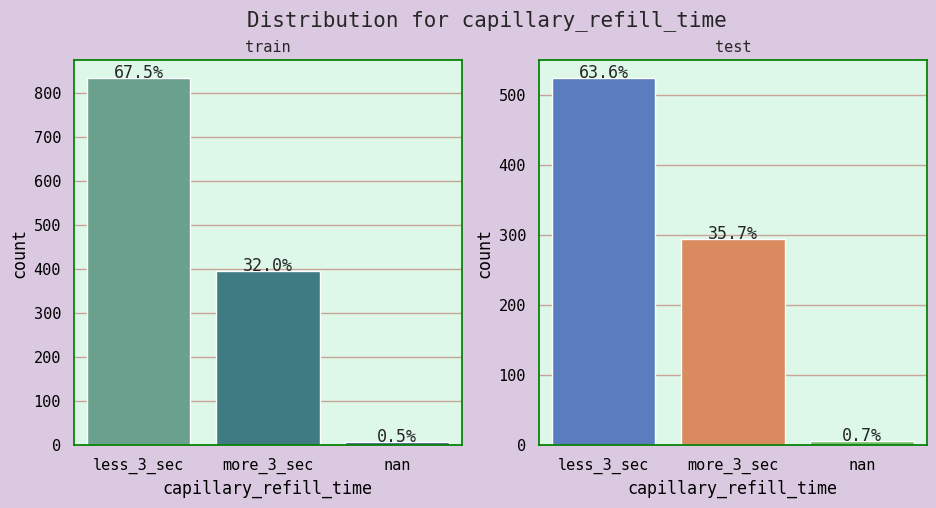

In [27]:
feature_dist('capillary_refill_time')

***

<div style="border-radius:20px; border:#746AB0 solid; padding: 20px; background-color: #7FFFD4; font-size:100%; text-align:left; padding-top: 5px; padding-bottom: 5px">
<h2 align="left"><font color='#800080'>Pain</font></h2>
    <p style="line-height: 1.5; font-size:100%; font-family: Verdana; letter-spacing: 0.5px;"><b>A subjective judgement of the horse's pain level</b><br>
        <b>1. alert (no pain)</b><br>
        <b>2. depressed</b><br>
        <b>3. mild_pain</b><br>
        <b>4. severe_pain</b><br>
        <b>5. extreme_pain</b></p>
</div>

In [28]:
train['pain'].value_counts(dropna=False),\
test['pain'].value_counts(dropna=False)

(pain
 depressed       429
 mild_pain       408
 severe_pain     146
 extreme_pain    120
 alert            87
 NaN              44
 slight            1
 Name: count, dtype: int64,
 pain
 depressed       310
 mild_pain       255
 severe_pain     115
 extreme_pain     82
 alert            32
 NaN              29
 moderate          1
 Name: count, dtype: int64)

Train data contains one value with slight pain and test contain one value with moderate pain. Let's convert these into the mild_pain category

In [29]:
# convert slight and moderate to mild pain category
train['pain'].replace({'slight': 'mild_pain'}, inplace=True)
test['pain'].replace({'moderate': 'mild_pain'}, inplace=True)

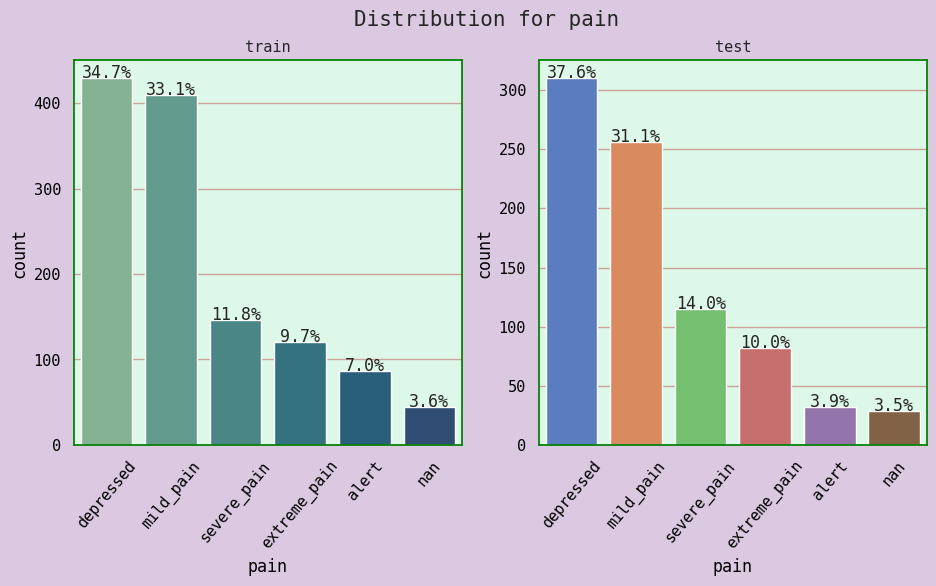

In [30]:
feature_dist('pain', rot=50)

<div style="font-family: Verdana; background-color: #FFC09F; padding: 10px; border-radius: 5px; padding-top: 10px; padding-bottom: 2px; letter-spacing: 0.5px">  
    <ul>
        <li><b><i>Should NOT be treated as a ordered or discrete variable!</i></b></li>
        <li><b><i>In general, the more painful, the more likely it is to require surgery</i></b></li>
        <li><b><i>Prior treatment of pain may mask the pain level to some extent</i></b></li>
    </ul>

***

<div style="border-radius:20px; border:#746AB0 solid; padding: 20px; background-color: #7FFFD4; font-size:100%; text-align:left; padding-top: 5px; padding-bottom: 5px">
<h2 align="left"><font color='#800080'>Peristalsis</font></h2>
    <p style="line-height: 1.5; font-size:100%; font-family: Verdana; letter-spacing: 0.5px;"><b>An indication of the activity in the horse's gut.</b><br>
        <b>1. hypermotile</b><br>
        <b>2. normal</b><br>
        <b>3. hypomotile</b><br>
        <b>4. absent</b>
</p></div>

In [31]:
train['peristalsis'].value_counts(dropna=False)

peristalsis
hypomotile       664
absent           444
normal            53
hypermotile       53
NaN               20
distend_small      1
Name: count, dtype: int64

One value in training data has distend_small as the peristalsis type which makes no sense. Let's treat this value as null.

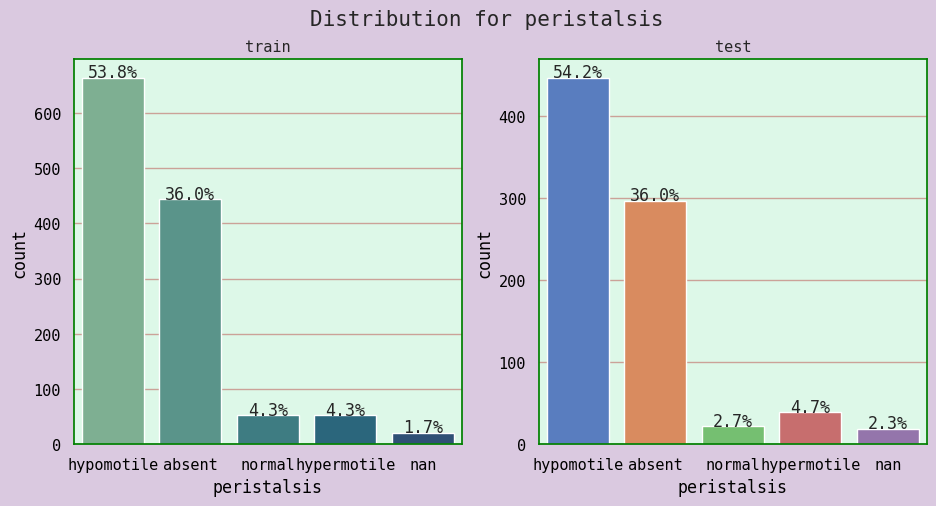

In [32]:
train['peristalsis'].replace({'distend_small': np.nan}, inplace=True)
feature_dist('peristalsis')

<div style="font-family: Verdana; background-color: #FFC09F; padding: 10px; border-radius: 5px; padding-top: 10px; padding-bottom: 10px; letter-spacing: 0.5px">
<b><i>As the gut becomes more distended or the horse becomes more toxic, the activity decreases</i></b>

***

<div style="border-radius:20px; border:#746AB0 solid; padding: 20px; background-color: #7FFFD4; font-size:100%; text-align:left; padding-top: 5px; padding-bottom: 5px">
<h2 align="left"><font color='#800080'>Abdominal distension</font></h2>
    <p style="line-height: 1.5; font-size:100%; font-family: Verdana; letter-spacing: 0.5px;"><b>An IMPORTANT parameter</b><br>
        <b>1. none</b><br>
        <b>2. slight</b><br>
        <b>3. moderate</b><br>
        <b>4. severe</b>
</p></div>

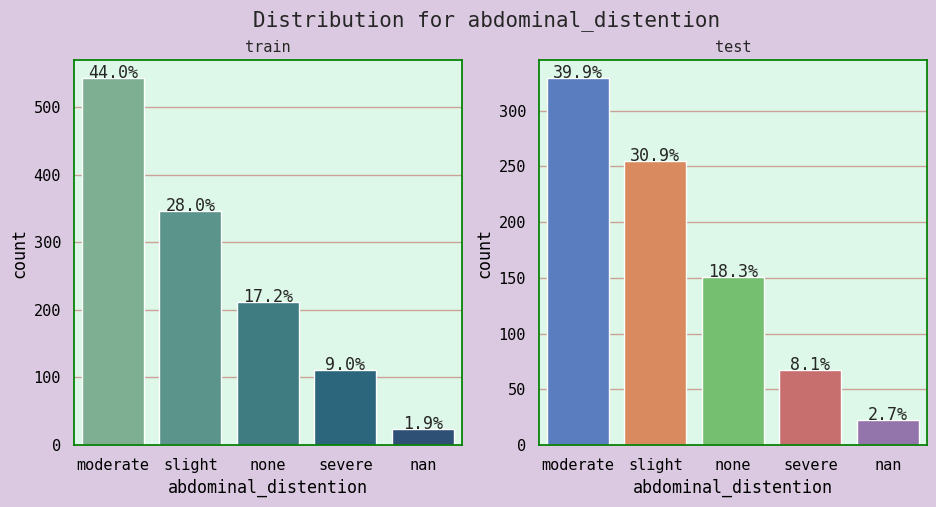

In [33]:
feature_dist('abdominal_distention')

<div style="font-family: Verdana; background-color: #FFC09F; padding: 10px; border-radius: 5px; padding-top: 10px; padding-bottom: 2px; letter-spacing: 0.5px">  
    <ul>
        <li><b><i>An animal with abdominal distension is likely to be painful and have reduced gut motility</i></b></li>
        <li><b><i>A horse with severe abdominal distension is likely to require surgery just to relieve the pressure</i></b></li>
    </ul>

***

<div style="border-radius:20px; border:#746AB0 solid; padding: 20px; background-color: #7FFFD4; font-size:100%; text-align:left; padding-top: 5px; padding-bottom: 5px">
<h2 align="left"><font color='#800080'>Nasogastric tube</font></h2>
    <p style="line-height: 1.5; font-size:100%; font-family: Verdana; letter-spacing: 0.5px;"><b>This refers to any gas coming out of the tube</b><br>
        <b>1. none</b><br>
        <b>2. slight</b><br>
        <b>3. significant</b>
</p></div>

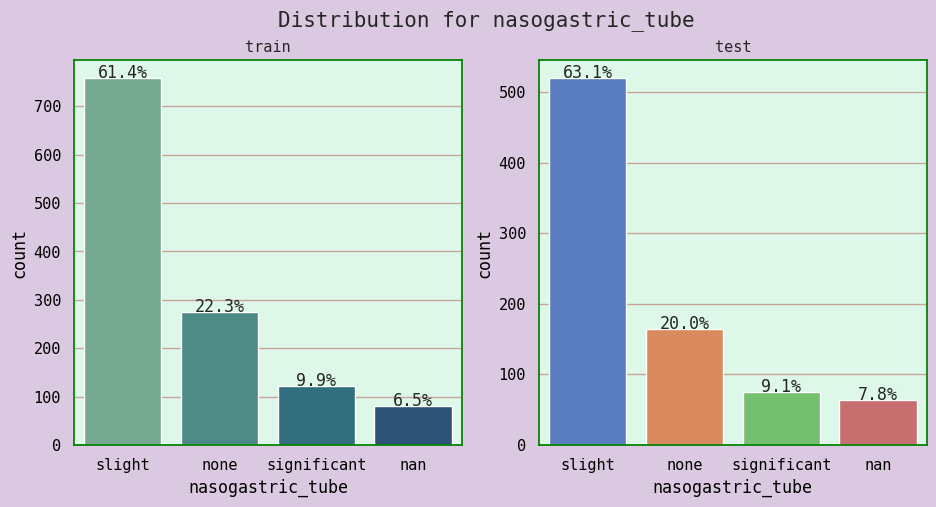

In [34]:
feature_dist('nasogastric_tube')

<div style="font-family: Verdana; background-color: #FFC09F; padding: 10px; border-radius: 5px; padding-top: 10px; padding-bottom: 10px; letter-spacing: 0.5px">
<b><i>A large gas cap in the stomach is likely to give the horse discomfort</i></b>

***

<div style="border-radius:20px; border:#746AB0 solid; padding: 20px; background-color: #7FFFD4; font-size:100%; text-align:left; padding-top: 5px; padding-bottom: 5px">
<h2 align="left"><font color='#800080'>Nasogastric reflux</font></h2>
    <p style="line-height: 1.5; font-size:100%; font-family: Verdana; letter-spacing: 0.5px;">
        <b>1. none</b><br>
        <b>2. less_1_liter (&lt; 1 liter)</b><br>
        <b>3. more_1_liter (&gt; 1 liter)</b>
</p></div>

In [35]:
train['nasogastric_reflux'].value_counts(dropna=False)

nasogastric_reflux
more_1_liter    604
none            331
less_1_liter    278
NaN              21
slight            1
Name: count, dtype: int64

In this column too an outlier is present with value slight. Let's change this to nan.

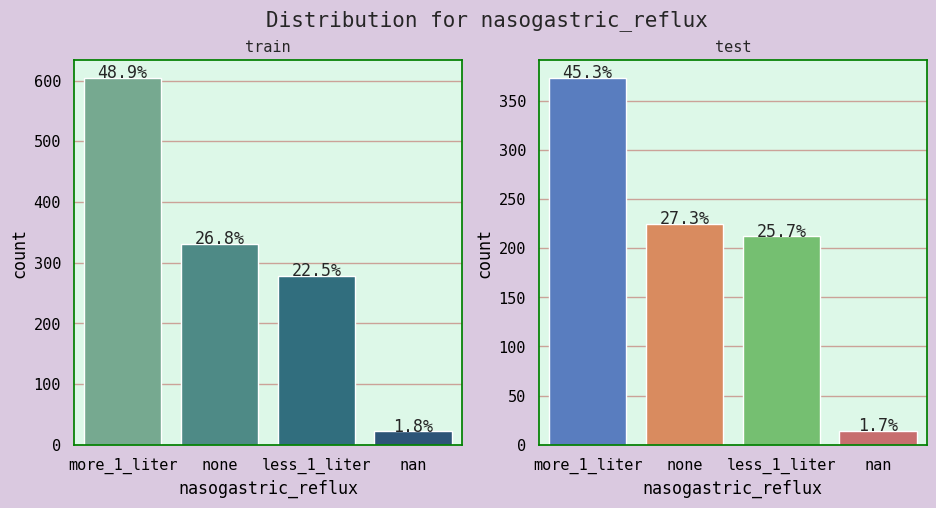

In [36]:
train['nasogastric_reflux'].replace({'slight': np.nan}, inplace=True)
feature_dist('nasogastric_reflux')

<div style="font-family: Verdana; background-color: #FFC09F; padding: 10px; border-radius: 5px; padding-top: 10px; padding-bottom: 10px; letter-spacing: 0.5px">
<b><i>The greater amount of reflux, the more likelihood that there is some serious obstruction to the fluid passage from the rest of the intestine</i></b>

***

<div style="border-radius:20px; border:#746AB0 solid; padding: 20px; background-color: #7FFFD4; font-size:100%; text-align:left; padding-top: 5px; padding-bottom: 5px">
<h2 align="left"><font color='#800080'>Nasogastric reflux ph</font></h2>
    <p style="line-height: 1.5; font-size:100%; font-family: Verdana; letter-spacing: 0.5px;">
</p></div>

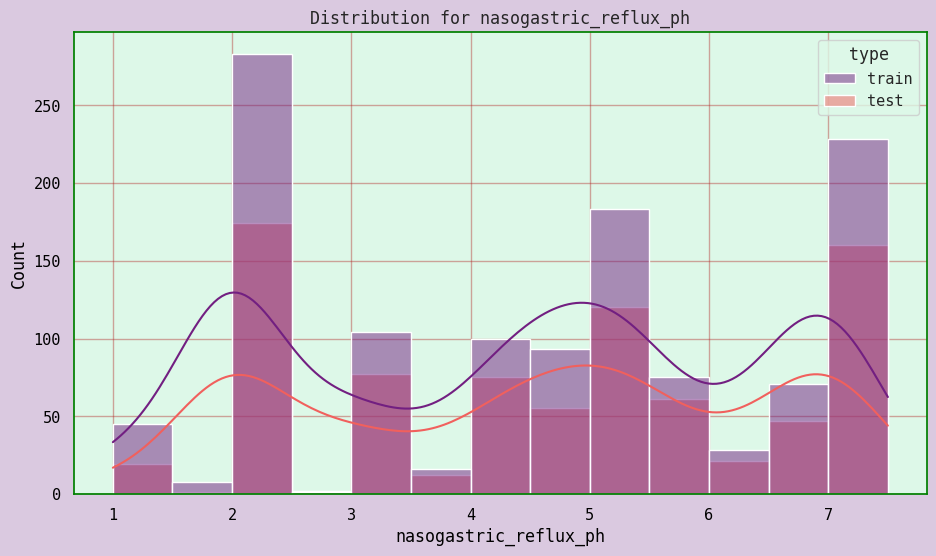

In [37]:
feature_dist('nasogastric_reflux_ph')

<div style="font-family: Verdana; background-color: #FFC09F; padding: 10px; border-radius: 5px; padding-top: 10px; padding-bottom: 2px; letter-spacing: 0.5px">  
    <ul>
        <li><b><i>Scale is from 0 to 14 with 7 being neutral</i></b></li>
        <li><b><i>Normal values are in the 3 to 4 range</i></b></li>
    </ul>

In [38]:
median_feature('nasogastric_reflux_ph', 'lived')
median_feature('nasogastric_reflux_ph', 'died')
median_feature('nasogastric_reflux_ph', 'euthanized')

Median nasogastric_reflux_ph value for horses that lived: 5.0
Median nasogastric_reflux_ph value for horses that died: 5.0
Median nasogastric_reflux_ph value for horses that euthanized: 2.0


In [39]:
train['ph_norm'] = abs(train['nasogastric_reflux_ph'] - 4)
test['ph_norm'] = abs(test['nasogastric_reflux_ph'] - 4)

***

<div style="border-radius:20px; border:#746AB0 solid; padding: 20px; background-color: #7FFFD4; font-size:100%; text-align:left; padding-top: 5px; padding-bottom: 5px">
<h2 align="left"><font color='#800080'>Rectal examination feces</font></h2>
    <p style="line-height: 1.5; font-size:100%; font-family: Verdana; letter-spacing: 0.5px;">
        <b>1. normal</b><br>
        <b>2. increased</b><br>
        <b>3. decreased</b><br>
        <b>4. absent</b>
</p></div>

In [40]:
train['rectal_exam_feces'].value_counts(dropna=False)

rectal_exam_feces
absent           493
decreased        269
normal           233
NaN              190
increased         49
serosanguious      1
Name: count, dtype: int64

Another value making no sense at all. Let's convert this to null as well.

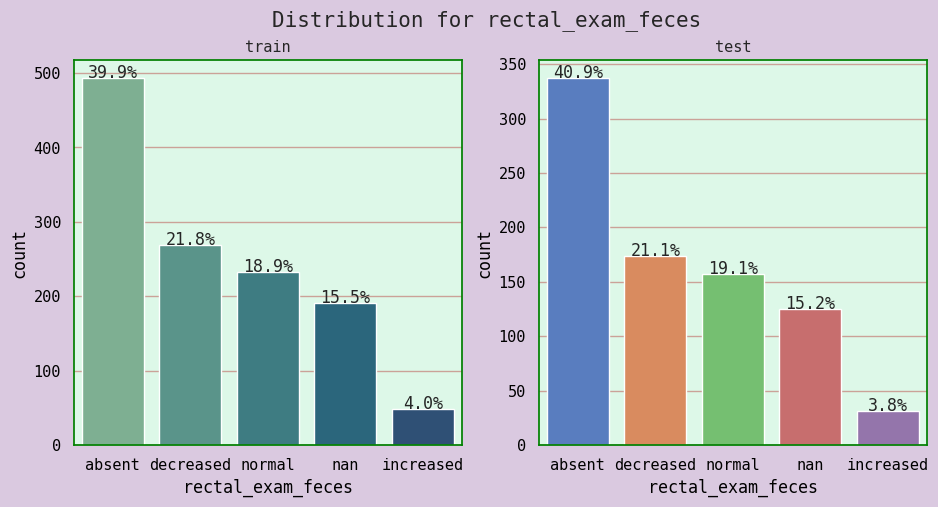

In [41]:
train['rectal_exam_feces'].replace({'serosanguious': np.nan}, inplace=True)
feature_dist('rectal_exam_feces')

<div style="font-family: Verdana; background-color: #FFC09F; padding: 10px; border-radius: 5px; padding-top: 10px; padding-bottom: 10px; letter-spacing: 0.5px">
<b><i>Absent feces probably indicates an obstruction</i></b>

***

<div style="border-radius:20px; border:#746AB0 solid; padding: 20px; background-color: #7FFFD4; font-size:100%; text-align:left; padding-top: 5px; padding-bottom: 5px">
<h2 align="left"><font color='#800080'>Abdomen</font></h2>
    <p style="line-height: 1.5; font-size:100%; font-family: Verdana; letter-spacing: 0.5px;">
        <b>1. normal</b><br>
        <b>2. other</b><br>
        <b>3. firm</b><br>
        <b>4. distend_small</b><br>
        <b>5. distend_large</b>
</p></div>

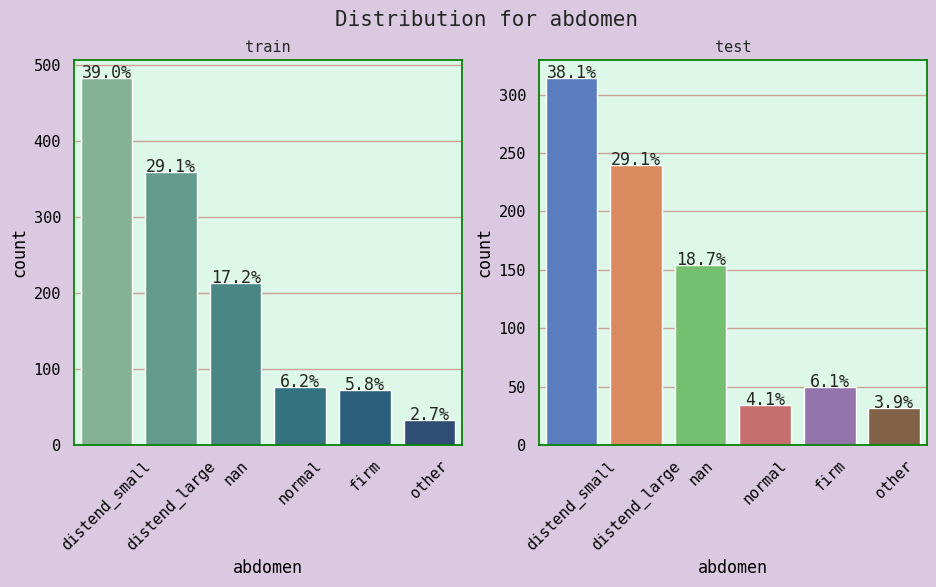

In [42]:
feature_dist('abdomen', rot=45)

<div style="font-family: Verdana; background-color: #FFC09F; padding: 10px; border-radius: 5px; padding-top: 10px; padding-bottom: 2px; letter-spacing: 0.5px"> 
    <ul>
        <li><b><i>firm is probably an obstruction caused by a mechanical impaction and is normally treated medically</i></b></li>
        <li><b><i>distend_small and distend_large indicate a surgical lesion</i></b></li>
    </ul>

***

<div style="border-radius:20px; border:#746AB0 solid; padding: 20px; background-color: #7FFFD4; font-size:100%; text-align:left; padding-top: 5px; padding-bottom: 5px">
<h2 align="left"><font color='#800080'>Packed cell volume</font></h2>
    <p style="line-height: 1.5; font-size:100%; font-family: Verdana; letter-spacing: 0.5px;"><b>The number of red cells by volume in the blood</b>
</p></div>

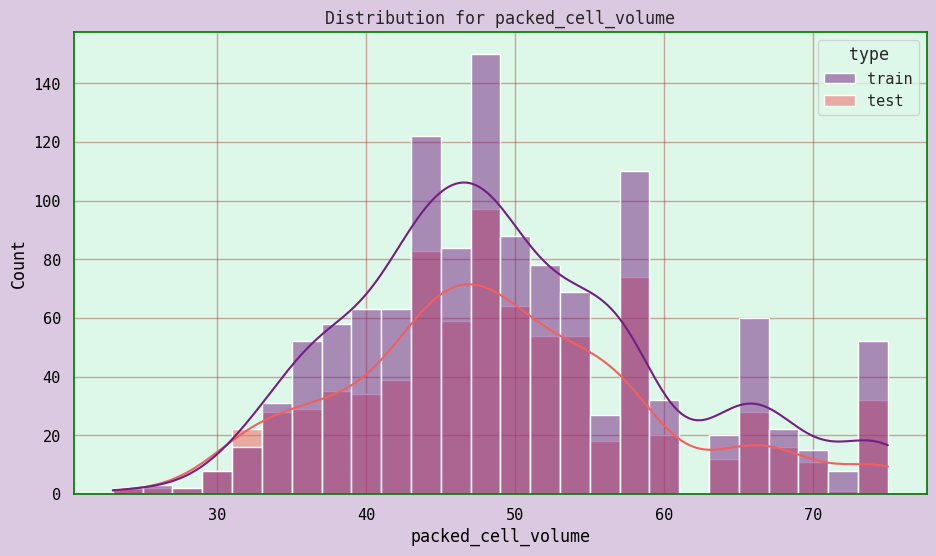

In [43]:
feature_dist('packed_cell_volume')

<div style="font-family: Verdana; background-color: #FFC09F; padding: 10px; border-radius: 5px; padding-top: 10px; padding-bottom: 2px; letter-spacing: 0.5px"> 
    <ul>
        <li><b><i>Normal range is 30 to 50</i></b></li>
        <li><b><i>The level rises as the circulation becomes compromised or as the animal becomes dehydrated</i></b></li>
    </ul>

***

<div style="border-radius:20px; border:#746AB0 solid; padding: 20px; background-color: #7FFFD4; font-size:100%; text-align:left; padding-top: 5px; padding-bottom: 5px">
<h2 align="left"><font color='#800080'>Total protein</font></h2>
    <p style="line-height: 1.5; font-size:100%; font-family: Verdana; letter-spacing: 0.5px;">
</p></div>

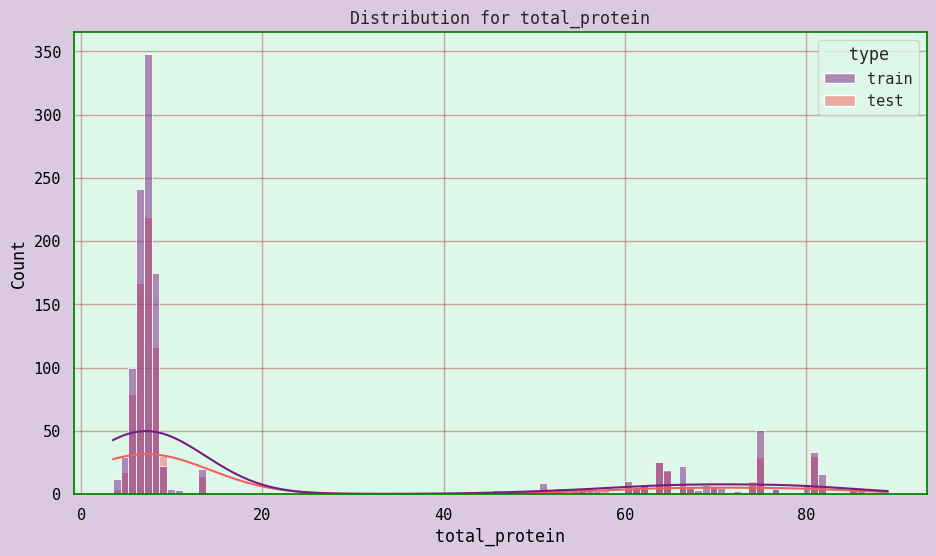

In [44]:
feature_dist('total_protein', bins=100)

<div style="font-family: Verdana; background-color: #FFC09F; padding: 10px; border-radius: 5px; padding-top: 10px; padding-bottom: 2px; letter-spacing: 0.5px"> 
    <ul>
        <li><b><i>Normal values lie in the 6-7.5 (gms/dL) range but the distribution says otherwise. Either this could be a useful feature or not at all.</i></b></li>
        <li><b><i>The higher the value the greater the dehydration</i></b></li>
    </ul>

In [45]:
median_feature('total_protein', 'lived')
median_feature('total_protein', 'died')
median_feature('total_protein', 'euthanized')

Median total_protein value for horses that lived: 7.45
Median total_protein value for horses that died: 7.2
Median total_protein value for horses that euthanized: 60.0


***

<div style="border-radius:20px; border:#746AB0 solid; padding: 20px; background-color: #7FFFD4; font-size:100%; text-align:left; padding-top: 5px; padding-bottom: 5px">
<h2 align="left"><font color='#800080'>Abdominocentesis appearance</font></h2>
    <p style="line-height: 1.5; font-size:100%; font-family: Verdana; letter-spacing: 0.5px;"><b>A needle is put in the horse's abdomen and fluid is obtained from the abdominal cavity</b><br>
        <b>1. clear</b><br>
        <b>2. cloudy</b><br>
        <b>3. serosanguinous</b>
</p></div>

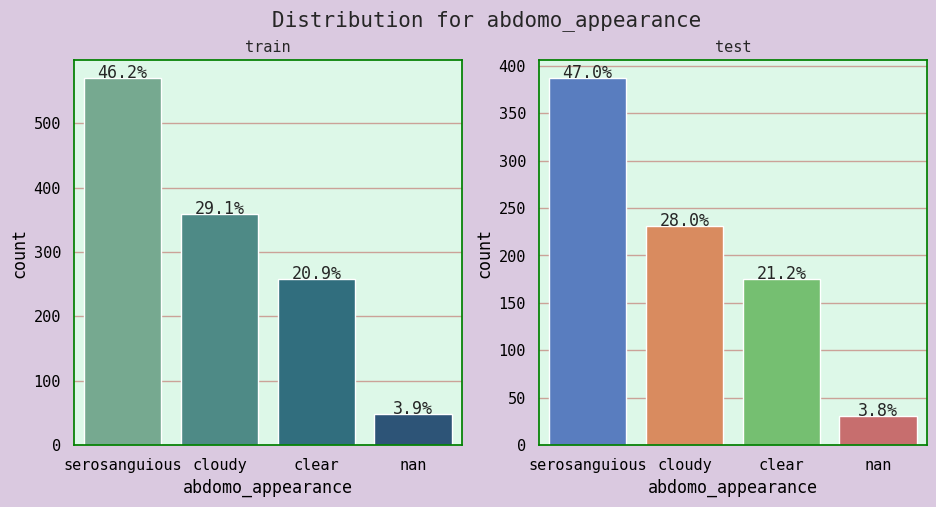

In [46]:
feature_dist('abdomo_appearance')

<div style="font-family: Verdana; background-color: #FFC09F; padding: 10px; border-radius: 5px; padding-top: 10px; padding-bottom: 10px; letter-spacing: 0.5px"> 
    <b><i>Normal fluid is clear while cloudy or serosanguinous indicates a compromised gut</i></b>

***

<div style="border-radius:20px; border:#746AB0 solid; padding: 20px; background-color: #7FFFD4; font-size:100%; text-align:left; padding-top: 5px; padding-bottom: 5px">
<h2 align="left"><font color='#800080'>Abdomcentesis total protein</font></h2>
    <p style="line-height: 1.5; font-size:100%; font-family: Verdana; letter-spacing: 0.5px;">
</p></div>

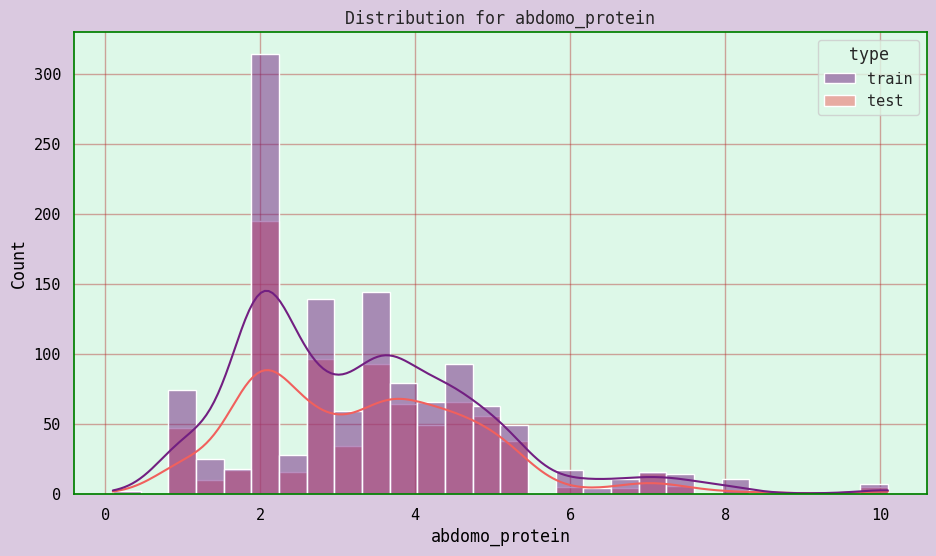

In [47]:
feature_dist('abdomo_protein')

<div style="font-family: Verdana; background-color: #FFC09F; padding: 10px; border-radius: 5px; padding-top: 10px; padding-bottom: 10px; letter-spacing: 0.5px"> 
    <b><i>The higher the level of protein the more likely it is to have a compromised gut. Values are in gms/dL</i></b>

***

<div style="border-radius:20px; border:#746AB0 solid; padding: 20px; background-color: #7FFFD4; font-size:100%; text-align:left; padding-top: 5px; padding-bottom: 5px">
<h2 align="left"><font color='#800080'>Surgical lesion</font></h2>
    <p style="line-height: 1.5; font-size:100%; font-family: Verdana; letter-spacing: 0.5px;"><b>Retrospectively, was the problem (lesion) surgical?</b><br>
        <b>1. yes</b><br>
        <b>2. no</b>
</p></div>

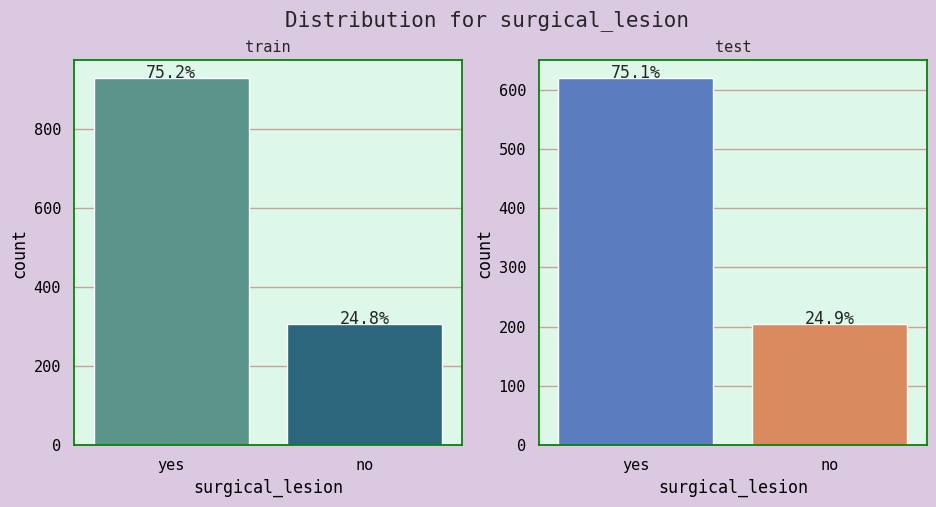

In [48]:
feature_dist('surgical_lesion')

<div style="font-family: Verdana; background-color: #FFC09F; padding: 10px; border-radius: 5px; padding-top: 10px; padding-bottom: 10px; letter-spacing: 0.5px"> 
    <b><i>All cases are either operated upon or autopsied so that this value and the lesion type are always known</i></b>

***

<div style="border-radius:20px; border:#746AB0 solid; padding: 20px; background-color: #7FFFD4; font-size:100%; text-align:left; padding-top: 5px; padding-bottom: 5px">
<h2 align="left"><font color='#800080'>Type of lesion</font></h2>
    <p style="line-height: 1.5; font-size:100%; font-family: Verdana; letter-spacing: 0.5px;"><b>The lesion_1 looks like a numeric feature but is not. This feature contains 4 numbers typically which are<br> i) site of lesion<br> ii) type of lesion<br> iii) subtype of lesion<br> iv) specific code.<br> Each of these are described below:</b></p>
        <h3 align="left"><font color='#800080'>Site</font></h3>
    <b>1 = gastric</b><br>
    <b>2 = sm intestine</b><br>
    <b>3 = lg colon</b><br>
    <b>4 = lg colon and cecum</b><br>
    <b>5 = cecum</b><br>
    <b>6 = transverse colon</b><br>
    <b>7 = retum/descending colon</b><br>
    <b>8 = uterus</b><br>
    <b>9 = bladder</b><br>
    <b>11 = all intestinal sites</b><br>
        <b>00 = none</b>
    
<h3 align="left"><font color='#800080'>Type</font></h3>
    <b>1 = simple</b><br>
    <b>2 = strangulation</b><br>
    <b>3 = inflammation</b><br>
    <b>4 = other</b><br>
    <b>0 = n/a</b>
 
<h3 align="left"><font color='#800080'>Subtype</font></h3>
    <body><b>1 = mechanical</b><br>
    <b>2 = paralytic</b><br>
    <b>0 = n/a</b>
        
<h3 align="left"><font color='#800080'>Specific code</font></h3>
    <b>1 = obturation</b><br>
    <b>2 = intrinsic</b><br>
    <b>3 = extrinsic</b><br>
    <b>4 = adynamic</b><br>
    <b>5 = volvulus/torsion</b><br>
    <b>6 = intussuption</b><br>
    <b>7 = thromboembolic</b><br>
    <b>8 = hernia</b><br>
    <b>9 = lipoma/slenic incarceration</b><br>
    <b>10 = displacement</b><br>
    <b>0 = n/a</b>

This could be the most valuable feature if we engineer it nicely. Domain knowledge plays a crucial part here.

In [49]:
print(f"Percentage of 0s in lesion_2 feature:{train[train.lesion_2 == 0].shape[0]/len(train)*100:.2f}%")
print(f"Percentage of 0s in lesion_3 feature:{train[train.lesion_3 == 0].shape[0]/len(train)*100:.2f}%")

Percentage of 0s in lesion_2 feature:99.35%
Percentage of 0s in lesion_3 feature:99.84%


Most of the values in the lesion_2 and lesion_3 are zero and these don't look like any valuable features so let's drop these and divide lesion_1 column in 4 separate features as given in the description

In [50]:
# Feature transformations
# train_df, test_df = train.copy(), test.copy()
def clean_and_transform(df):
    # change 3 to more_3_sec
    df['capillary_refill_time'].replace({'3': 'more_3_sec'}, inplace=True)
    # convert slight and moderate to mild pain category
    df['pain'].replace({'slight': 'mild_pain'}, inplace=True)
    df['pain'].replace({'moderate': 'mild_pain'}, inplace=True)
    # clean below 3 columns
    df['peristalsis'].replace({'distend_small': np.nan}, inplace=True)
    df['nasogastric_reflux'].replace({'slight': np.nan}, inplace=True)
    df['rectal_exam_feces'].replace({'serosanguious': np.nan}, inplace=True)
    
    df['rectal_temp'] = df['rectal_temp'] - 37.8
    df['total_protein_cat'] = df['total_protein'] > 40
    df['lesion_1'] = df['lesion_1'].astype('str')
    df['lesion1'] = df['lesion_1'].apply(lambda x: x+'0'*(4-len(x)) if len(x) <= 4 else x)
    df['lesion_site'] = df['lesion1'].apply(lambda x: x[:2] if len(x) == 5 and x[0] == '1' else x[0])
    df['lesion_type'] = df['lesion1'].apply(lambda x: x[2] if len(x) == 5 and x[0] == '1' else x[1])
    df['lesion_subtype'] = df['lesion1'].apply(lambda x: x[3] if len(x) == 5 and x[0] == '1' else x[2])
    df['lesion_code'] = df['lesion1'].apply(lambda x: x[-2:] if len(x) == 5 and x[0] != '1' else x[-1])
    df = df.drop(['id', 'lesion1', 'lesion_1', 'lesion_2', 'lesion_3'], axis=1)
    return df
train_df = clean_and_transform(train)
test_df = clean_and_transform(test)

In [51]:
# Replacing value 7 with 0 for test_df as it is not present in train_df
test_df.lesion_type.replace({'7': '0'}, inplace=True)

***

<div style="border-radius:20px; border:#746AB0 solid; padding: 20px; background-color: #7FFFD4; font-size:100%; text-align:left; padding-top: 5px; padding-bottom: 5px">
<h2 align="left"><font color='#800080'>Cp data</font></h2>
    <p style="line-height: 1.5; font-size:100%; font-family: Verdana; letter-spacing: 0.5px;"><b>Is pathology data present for this case?</b><br>
        <b>1. yes</b><br>
        <b>2. no</b>
</p></div>

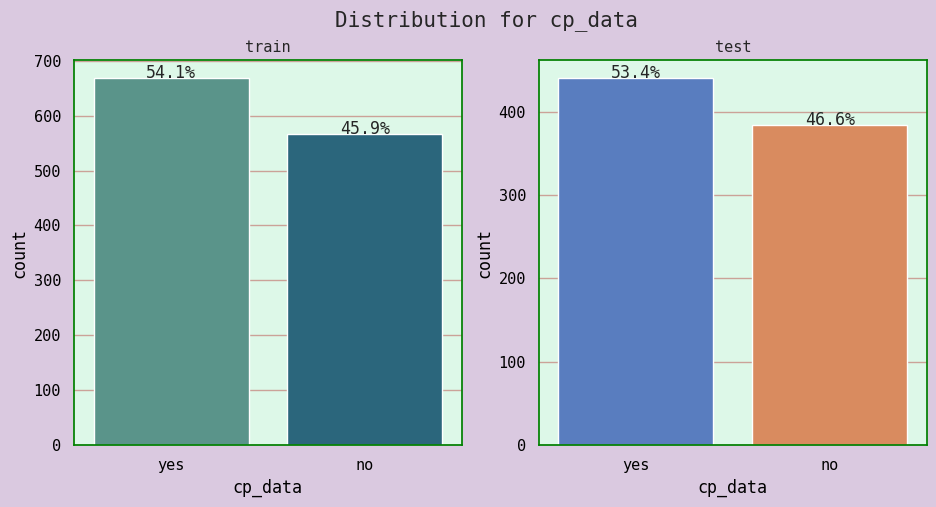

In [52]:
feature_dist('cp_data')

<div style="font-family: Verdana; background-color: #FFC09F; padding: 10px; border-radius: 5px; padding-top: 10px; padding-bottom: 10px; letter-spacing: 0.5px"> 
    <b><i>This variable is of no significance since pathology data is not included or collected for these cases(original description). But let us keep this for the time being and see this feature's importance after training.</i></b>

# <p style="font-family: Georgia; letter-spacing: 1px; color:#2F1B25; font-size:110%; text-align:center; padding: 0px; border-bottom: 2px solid #000000; padding-top: 0px; padding-bottom: 5px"> Feature Selection🧺</p>

In this section I will be focusing on feature selection techniques to eliminate redundant and uninformative features.

In [53]:
# Loading required libraries
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import mutual_info_classif
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import f1_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [54]:
# Encoding categorical features to numerical values
numeric_cols = train_df.select_dtypes(include='number').columns.tolist()
cat_cols = train_df.select_dtypes(include='object').columns.tolist()
label_encoders = {}
for col in cat_cols:
    label_encoders[col] = LabelEncoder()
    train_df[col + '_encoded'] = label_encoders[col].fit_transform(train_df[col])
    if col != 'outcome':
        test_df[col + '_encoded'] = label_encoders[col].transform(test_df[col])

## <p style="font-family: Georgia; letter-spacing: 1px; color:#2F1B25; font-size:110%; text-align:center; padding: 0px; border-bottom: 2px solid #000000; padding-top: 0px; padding-bottom: 5px">Mutual Information</p>

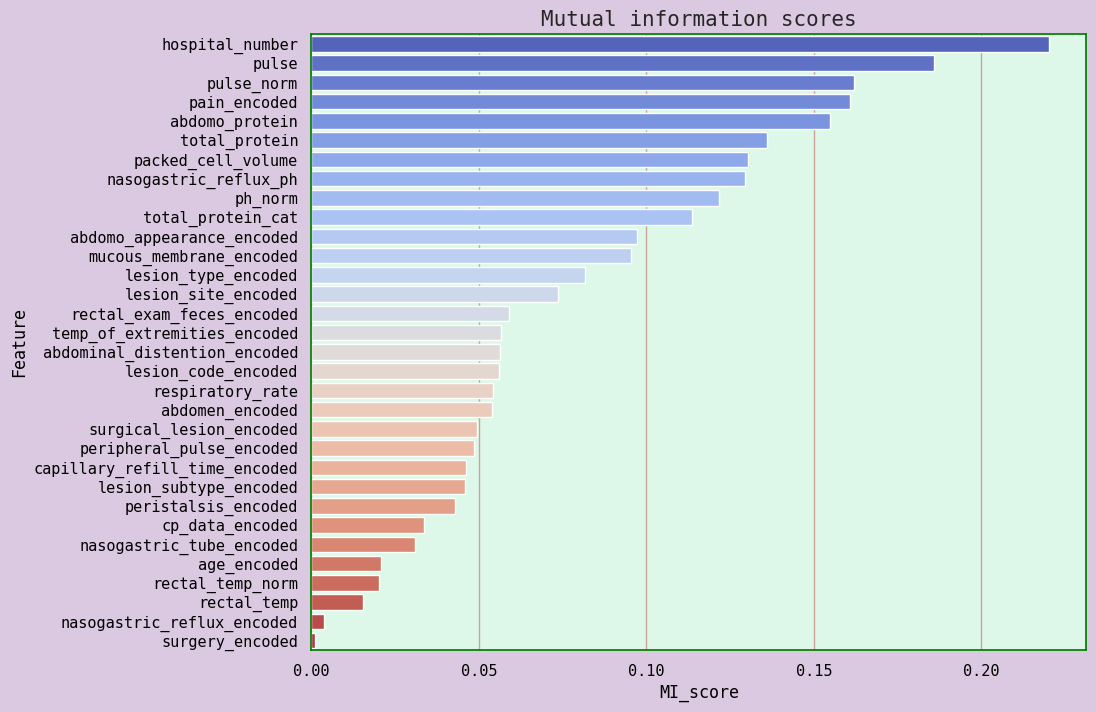

In [55]:
X = train_df.drop(cat_cols+['outcome_encoded'], axis=1)
y = train_df['outcome_encoded']
mi_scores = pd.DataFrame({'Feature': X.columns, 'MI_score': mutual_info_classif(X, y)})
mi_scores = mi_scores.sort_values('MI_score', ascending=False)
plt.figure(figsize=(10,8))
sns.barplot(data=mi_scores, x='MI_score', y='Feature', palette='coolwarm')
plt.title("Mutual information scores", fontsize=15)
plt.show()

<div style="font-family: Verdana; background-color: #FFC09F; padding: 10px; border-radius: 5px; padding-top: 10px; padding-bottom: 10px; letter-spacing: 0.5px"> 
    Most of the highly informative features are the numerical features according to the MI scores.</div>

In [56]:
# for i in range(1, len(mi_scores)+1):
#     mi_cols = mi_scores[:i].Feature.tolist()
#     print(f"----------Model scores with top {i} features based on Mutual Information----------")
#     make_predictions(mi_cols)
#     print("*"*50)

## <p style="font-family: Georgia; letter-spacing: 1px; color:#2F1B25; font-size:110%; text-align:center; padding: 0px; border-bottom: 2px solid #000000; padding-top: 0px; padding-bottom: 5px">Correlation</p>

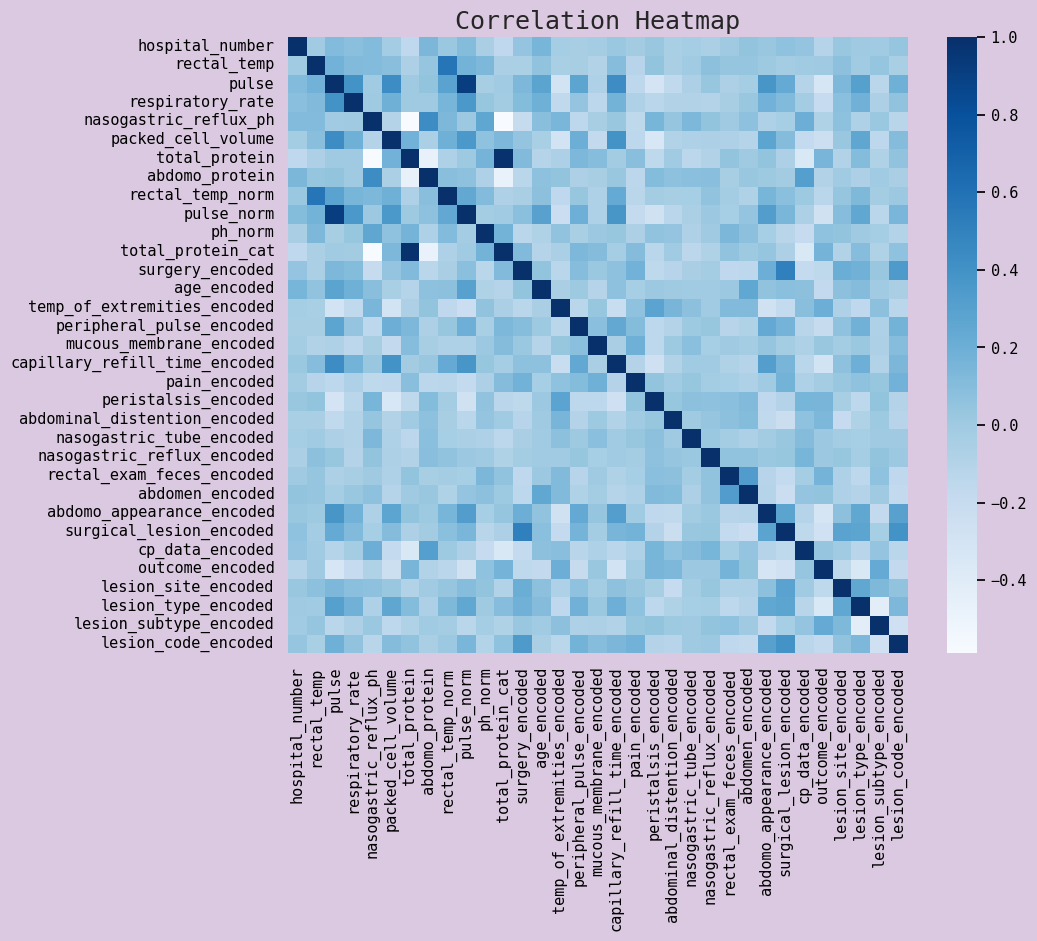

In [57]:
# Plotting correlation heatmap 
plt.figure(figsize=(10,8))
sns.heatmap(train_df.drop(cat_cols, axis=1).corr(), cmap='Blues')
plt.title("Correlation Heatmap", fontsize=18)
plt.show()

Let's now see the correlation of the features with outcome.

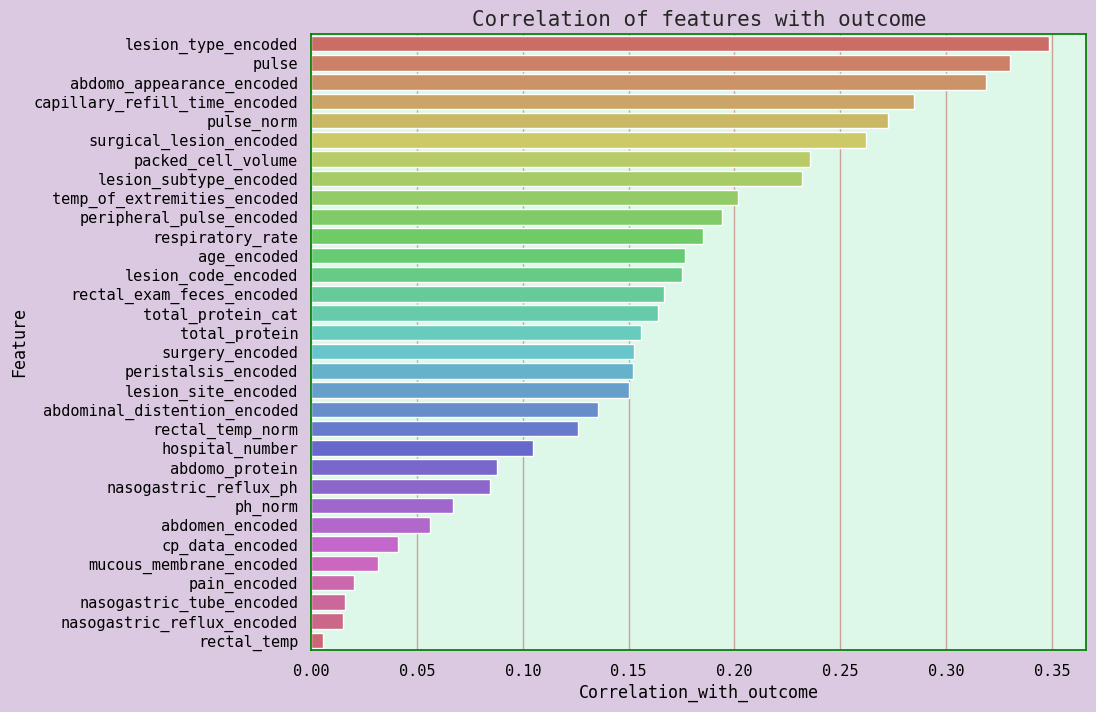

In [58]:
corrs = abs(train_df.drop(cat_cols, axis=1).corr()).outcome_encoded.sort_values(ascending=False)[1:].reset_index()
corrs.columns = ['Feature', 'Correlation_with_outcome']
plt.figure(figsize=(10,8))
sns.barplot(data=corrs, x='Correlation_with_outcome', y='Feature', palette='hls')
plt.title("Correlation of features with outcome", fontsize=15)
plt.show()

In [59]:
# Select features based on correlation threshold
def select_features(df, thresh):
    df = df[df['Correlation_with_outcome'] > thresh]
    return df['Feature'].values.tolist()

Let's now make a baseline model with the selected features and see the difference in model scores for different thresholds. [Micro-averaged F1-score](https://en.wikipedia.org/wiki/F-score) is the evaluation metric.

In [60]:
# Make predictions with baseline Random Forest with selected features
def make_predictions(cols):
    # Separate X and y
    X = train_df[cols]
    y = train_df['outcome_encoded']
    # Split into train and validation sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=24)
    # Initialized oob_score to True for easy cross-validation
    rf = RandomForestClassifier(oob_score=True, n_jobs=-1, random_state=24)
    # Fit the model
    rf.fit(X_train, y_train)
    print("Out of Bag score:", rf.oob_score_)
    # make predictions
    y_preds = rf.predict(X_test)
    # Calculate micro F1-score
    microF = f1_score(y_test, y_preds, average='micro')
    print("Micro-averaged F1-Score:", microF)

# Evaluating model on different thresholds
thresholds = [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3]
for thresh in thresholds:
    imp_cols = select_features(corrs, thresh=thresh)
    print(f"Model scores with {thresh} correlation threshold:")
    make_predictions(imp_cols)
    print("*"*50)

Model scores with 0.0 correlation threshold:
Out of Bag score: 0.6933198380566802
Micro-averaged F1-Score: 0.7408906882591093
**************************************************
Model scores with 0.05 correlation threshold:
Out of Bag score: 0.6842105263157895
Micro-averaged F1-Score: 0.7449392712550607
**************************************************
Model scores with 0.1 correlation threshold:
Out of Bag score: 0.6771255060728745
Micro-averaged F1-Score: 0.7246963562753036
**************************************************
Model scores with 0.15 correlation threshold:
Out of Bag score: 0.6700404858299596
Micro-averaged F1-Score: 0.7408906882591093
**************************************************
Model scores with 0.2 correlation threshold:
Out of Bag score: 0.5465587044534413
Micro-averaged F1-Score: 0.5910931174089069
**************************************************
Model scores with 0.25 correlation threshold:
Out of Bag score: 0.5384615384615384
Micro-averaged F1-Score: 0.603

<div style="font-family: Verdana; background-color: #FFC09F; padding: 10px; border-radius: 5px; padding-top: 10px; padding-bottom: 2px; letter-spacing: 0.5px">
    <p> The model performs better when all or most of the features are included.</p>
    </div>

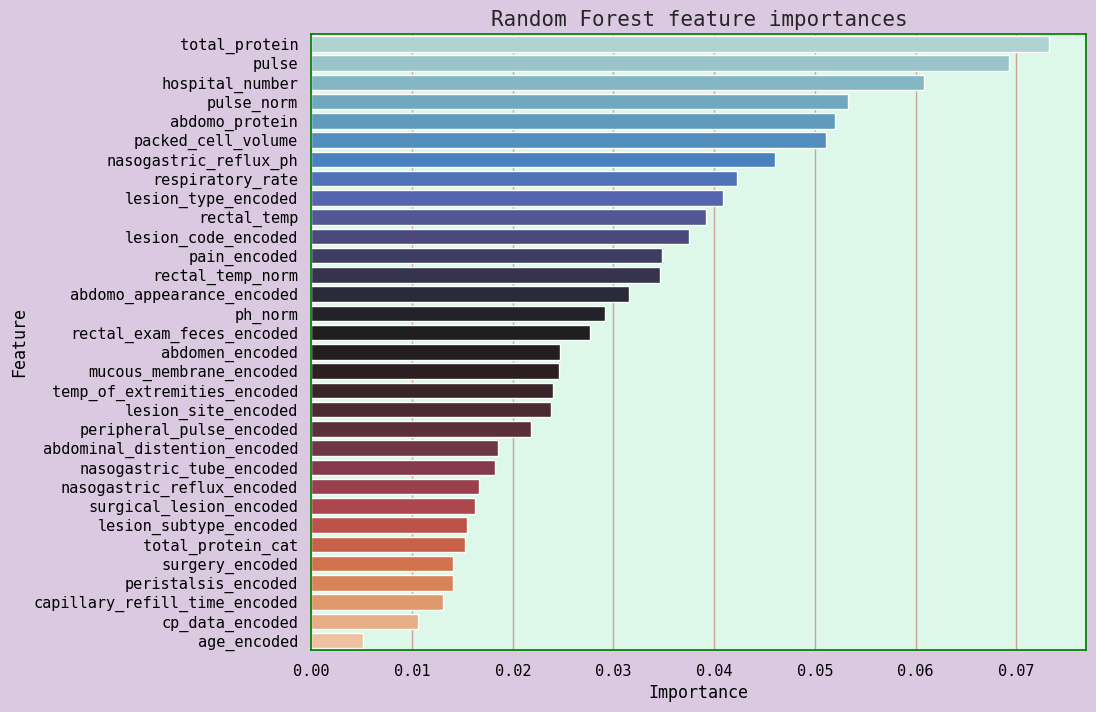

In [61]:
# Fit Random Forest model to data
rf_imp_cols = select_features(corrs, thresh=0.0)
X = train_df[rf_imp_cols]
y = train_df['outcome_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=24)
rf = RandomForestClassifier(oob_score=True, n_jobs=-1, random_state=24)
rf.fit(X_train, y_train)

# Feature importances using Random Forest
rf_imps = pd.DataFrame({"Feature": X_train.columns, "Importance": rf.feature_importances_})
rf_imps = rf_imps.sort_values('Importance', ascending=False)
plt.figure(figsize=(10,8))
sns.barplot(data=rf_imps, x="Importance", y="Feature", palette='icefire')
plt.title("Random Forest feature importances", fontsize=15)
plt.show()

Let's now make predictions one by one adding features to the data and see how it performs.

In [62]:
# Make predictions adding features one by one 
for i in range(1, len(rf_imps)+1):
    rf_imp_cols = rf_imps[:i].Feature.tolist()
    print(f"----------Model scores with top {i} features----------")
    make_predictions(rf_imp_cols)
    print("*"*50)

----------Model scores with top 1 features----------
Out of Bag score: 0.4777327935222672
Micro-averaged F1-Score: 0.5546558704453441
**************************************************
----------Model scores with top 2 features----------
Out of Bag score: 0.5607287449392713
Micro-averaged F1-Score: 0.5991902834008097
**************************************************
----------Model scores with top 3 features----------
Out of Bag score: 0.5738866396761133
Micro-averaged F1-Score: 0.6558704453441295
**************************************************
----------Model scores with top 4 features----------
Out of Bag score: 0.5850202429149798
Micro-averaged F1-Score: 0.6234817813765182
**************************************************
----------Model scores with top 5 features----------
Out of Bag score: 0.611336032388664
Micro-averaged F1-Score: 0.6720647773279352
**************************************************
----------Model scores with top 6 features----------
Out of Bag score: 0.629

<div style="font-family: Verdana; background-color: #FFC09F; padding: 10px; border-radius: 5px; padding-top: 10px; padding-bottom: 2px; letter-spacing: 0.5px">
    <p> The model performed better at the end when using most of the features The best score came by selecting 26 and 27 features.</p>
    </div>

Let's try to model with the top 27 features. This is one less than the total features we have. Excluding the most informative feature according to our model and retraining.

In [63]:
# Modeling with top 28 features
imp_cols = rf_imp_cols
X = train_df[imp_cols]
y = train_df['outcome_encoded']
rf = RandomForestClassifier(oob_score = True, n_jobs=-1, random_state=24)
rf.fit(X, y)

RandomForestClassifier(n_jobs=-1, oob_score=True, random_state=24)

In [64]:
X_final = test_df[imp_cols]
preds = rf.predict(X_final)
preds = label_encoders['outcome'].inverse_transform(preds)
sub = pd.read_csv(sub_path)
sub['outcome'] = preds
sub.to_csv("horse_submission.csv", index=False)

In [65]:
# X = train_df.drop('outcome', axis=1)
# # Encoding categorical features
# X = pd.get_dummies(X)
# y = train_df['outcome']
# y = y.map({'died': 1, 'lived': 2, 'euthanized': 0})

In [66]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=24)
# rf = RandomForestClassifier(oob_score=True, n_jobs=-1, random_state=24)
# rf.fit(X_train, y_train)
# print("Out of Bag score:", rf.oob_score_)
# y_preds = rf.predict(X_test)
# microF = f1_score(y_test, y_preds, average='micro')
# print("Validation accuracy:", accuracy_score(y_test, y_preds))
# print("Micro-averaged F1-Score:", microF)

In [67]:
xgb = XGBClassifier(random_state=24)
xgb.fit(X_train, y_train)
y_preds = xgb.predict(X_test)
microF = f1_score(y_test, y_preds, average='micro')
print("Validation accuracy:", accuracy_score(y_test, y_preds))
print("Micro-averaged F1-Score:", microF)

Validation accuracy: 0.728744939271255
Micro-averaged F1-Score: 0.728744939271255


<Axes: xlabel='Importance', ylabel='feature'>

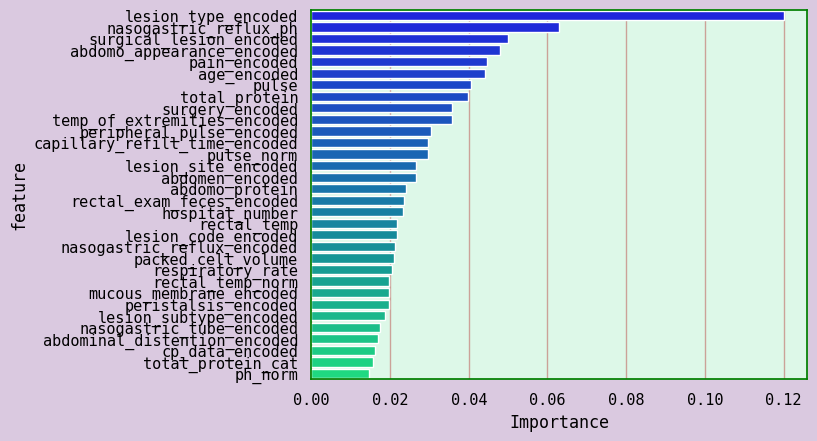

In [68]:
feature_imp = pd.DataFrame({'feature': X_train.columns, 'Importance': xgb.feature_importances_}) 
feature_imp = feature_imp.sort_values('Importance', ascending=False)
sns.barplot(data=feature_imp, x='Importance', y='feature', palette='winter')

## *TO BE CONTINUED....*